# 🎯 Monte Carlo Method: From Pi to Quantum Mechanics

## The Classic Example: Estimating π

In [32]:
import random 

shots = 1000000

def estimate_pi(shots):
    in_circle = 0
    for _ in range(shots):
        x = random.random()
        y = random.random()
        if x*x + y*y <= 1:
            in_circle += 1

    return ((in_circle * 4) / shots) 

for i in [1000, 10000, 100000, 1000000]:
    print(f"Estimated Pi with {i} shots: {estimate_pi(i)}")

Estimated Pi with 1000 shots: 3.072
Estimated Pi with 10000 shots: 3.1476
Estimated Pi with 100000 shots: 3.14012
Estimated Pi with 1000000 shots: 3.142892


## 🎲 How This Works:

1. **Random Sampling**: Generate random points (x,y) in a unit square [0,1]×[0,1]
2. **Test Condition**: Check if point falls inside unit circle (x² + y² ≤ 1)
3. **Count & Scale**: Count hits, multiply by 4 to get π estimate
4. **Convergence**: More samples → better accuracy

**Key Insight**: We're approximating the integral ∫∫ dxdy over the circle!

---

## 📋 General Monte Carlo Recipe:

### 1. **Define Your Problem**
- What quantity do you want to calculate?
- Can you express it as an expectation value or integral?

### 2. **Choose Sampling Strategy**
- **Importance sampling**: Sample where function is large (like |ψ|²)

### 3. **Generate Random Samples**
- Use appropriate random number generator
- Ensure samples are independent (or account for correlation)

### 4. **Evaluate Function at Each Sample**
- Calculate your quantity of interest at each random point
- Apply appropriate weights if using importance sampling

### 5. **Accumulate Statistics**
- Average your results: `⟨f⟩ = (1/N) Σf(xᵢ)`
- Calculate error: `σ = √(Var(f)/N)`

### 6. **Check Convergence**
- Error decreases as 1/√N
- Run multiple independent calculations
- Report: **Result ± Statistical Error**

---

## 🔬 From Pi to Quantum Mechanics:

| **Pi Estimation** | **Quantum MC** | **VQE**|
|-------------------|----------------|----------------|
| Random points in square | Random electron positions | Angles $\theta$ as parameters in ansatz (parametrized quantum circuit)|
| Test if in circle | Calculate |ψ(r)|² weight | 
| Count hits | Evaluate local energy E_L(r) | Changes parameters in each |
| Average × 4 = π | Weighted average = ⟨E⟩ | Lowest found state |

**Same principle, different physics!**

---

## ⚡ Monte Carlo Advantages:
- **Dimensionality**: Works in high dimensions (3D, 6D, 3N-dimensional...)
- **Flexibility**: Can handle complex geometries and interactions  
- **Scalability**: Parallelizes easily
- **Error control**: Statistical error is well-understood

## ⚠️ Monte Carlo Challenges:
- **Statistical noise**: Always has random error
- **Slow convergence**: Need many samples for high precision
- **Sampling efficiency**: Bad sampling wastes computational time

analytical solution: E = -0.5; a = 1

In [33]:
E_analytical = -0.5
a_analytical = 1.0

Import all necessary libraries for classical solutoin:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

We define all needed functions below:

In [35]:
def potential(r):
    """Coulomb potential for hydrogen atom: V(r) = -1/|r|"""
    distance = np.sqrt(np.dot(r, r))
    if distance == 0:
        return -float("inf")
    return -1 / distance

def psi(a, r):
    """Trial wave function: ψ(r) = exp(-a|r|)"""
    return np.exp(-a*np.sqrt(np.dot(r, r)))

def kinetic(a,r):
    """Local kinetic energy T_L = a(1/r - a/2)"""
    distance = np.sqrt(np.dot(r,r))
    if distance > 0:
        dinv = 1./distance
    else:
        print ('Warning: kinetic energy diverges at r=0')
        dinv = float("inf")
    return a * (dinv - 0.5 * a)
    return

def e_loc(a,r):
    """Local energy E_L(r) = T_L(r) + V(r)"""
    return kinetic(a,r) + potential(r)

## WHAT THESE FUNCTIONS DO:

• **potential()** - Coulomb attractive force between proton and electron \
• **psi()** - Our trial wave function with parameter 'a' \
• **kinetic()** - Local kinetic energy derived from ψ \
• **e_loc()** - Total local energy (kinetic + potential) 

**Local energy is the key to QMC: E_L(r) = Ĥψ(r)/ψ(r)**

(-2.0, 1.0)

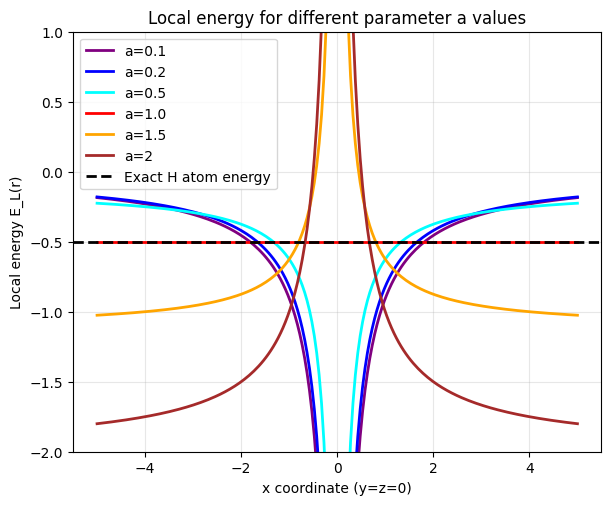

In [36]:
plt.figure(figsize=(15, 12))
# Plot of local energy along x-axis
plt.subplot(2, 2, 1)
x = np.linspace(-5, 5, 200)
x = x[x != 0] # Avoid singularity at r=0
a_vals = [0.1, 0.2, 0.5, 1., 1.5, 2]
colors = ['purple', 'blue', 'cyan', 'red', 'orange', 'brown']
for a, color in zip(a_vals, colors):
    y = []
    for r in x:
        e_val = e_loc(a, np.array([r, 0, 0]))
        # Clip extreme values for better visualization
        e_val = np.clip(e_val, -3, 2)
        y.append(e_val)
    plt.plot(x, y, label=f'a={a}', color=color, linewidth=2)
plt.axhline(y=-0.5, color='black', linestyle='--', linewidth=2,
           label='Exact H atom energy')
plt.xlabel('x coordinate (y=z=0)')
plt.ylabel('Local energy E_L(r)')
plt.title('Local energy for different parameter a values')
plt.legend(loc='upper left')
plt.grid(True, alpha=0.3)
plt.ylim(-2, 1)

## FROM THE GRAPH WE SEE:

• For a=1.0, E_L is most constant (≈ -0.5 hartree) \
• For other a values, E_L oscillates → worse wave function \
• Constant E_L means exact wave function (eigenfunction)

## 📊 Statistical Error Computation

The **standard error** of the mean is computed using the formula:

$\sigma_{\text{error}} = \sqrt{\frac{\text{Var}(E_L)}{N}}$

### Step-by-step calculation:

1. **Mean energy**:
   $\langle E_L \rangle = \frac{1}{N} \sum_{i=1}^{N} E_{L,i}$

2. **Variance**:
   $\text{Var}(E_L) = \frac{1}{N-1} \sum_{i=1}^{N} (E_{L,i} - \langle E_L \rangle)^2$

3. **Standard deviation**:
   $\sigma = \sqrt{\text{Var}(E_L)}$

4. **Standard error of the mean**:
   $\sigma_{\text{error}} = \frac{\sigma}{\sqrt{N}} = \sqrt{\frac{\text{Var}(E_L)}{N}}$

where **N** is the total number of Monte Carlo samples

This follows the standard statistical formula for the **standard error of the mean** (SEM), which quantifies the uncertainty in our energy estimate due to finite sampling.

In [37]:
def ave_error(arr):
    """Calculate average and statistical error from multiple MC runs"""
    M = len(arr)
    if M == 0:
        assert False, "Array is empty"
    if M == 1:
        return (arr[0], 0)
    average = np.mean(arr)
    variance = sum((arr - average)**2) / (M - 1)  # Sample variance
    error = np.sqrt(variance / M)  # Standard error of mean
    return (average, error)

## 📈 WHY WE NEED STATISTICS:

• **Monte Carlo gives slightly different results each time**\
• **We must run multiple independent calculations**\
• **Average ± error tells us the method's precision**\
• **Error decreases as 1/√(number_of_runs)**

## ⚡ HOW UNIFORM MC WORKS:

### Algorithm Steps:
1. **Pick random point r in box (-5,5)³**
2. **Calculate weight w = |ψ(r)|²**  
3. **Calculate local energy E_L(r)**
4. **Accumulate: E += w×E_L, normalization += w**
5. **Result: E = Σ(w×E_L) / Σ(w)**

### ✅ **ADVANTAGE:** 
Simple to understand

### ❌ **DISADVANTAGE:** 
Inefficient - samples regions with small |ψ|² too

In [38]:
def MonteCarlo_uniform(a, nmax):
    """
    Monte Carlo with uniform sampling in a box
    Energy = Σ(|ψ|² × E_L) / Σ(|ψ|²)
    """
    norm = 0
    E = 0
    for _ in range(nmax):
        # Random point in box (-5,5)³
        r = np.random.uniform(-10., 10., size=(3))
        f = psi(a, r)  # Wave function
        E_loc_val = e_loc(a, r)  # Local energy
        weight = f**2  # Weight = |ψ(r)|²
        norm += weight
        E += weight * E_loc_val
    return E / norm

Uniform Monte Carlo...

Searching for optimal parameter a:
 a=0.80: E=-0.472547 ± 0.007751
 a=0.87: E=-0.477305 ± 0.005465
 a=0.93: E=-0.498629 ± 0.002587
 a=1.00: E=-0.500000 ± 0.000000
 a=1.07: E=-0.498366 ± 0.003211
 a=1.13: E=-0.499898 ± 0.010246
 a=1.20: E=-0.501423 ± 0.014059
 a=1.27: E=-0.479164 ± 0.044112
 a=1.33: E=-0.463201 ± 0.053083
 a=1.40: E=-0.457793 ± 0.039425


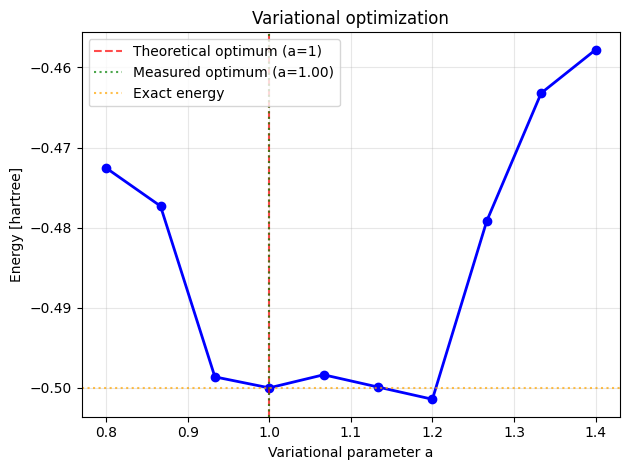

In [39]:
print("Uniform Monte Carlo...")
a_values = np.linspace(0.8, 1.4, 10)  # Range of variational parameters to test
energies_var = []  # List to store energies for each 'a' value
print("\nSearching for optimal parameter a:")

for a_test in a_values:
   # Run Monte Carlo simulation 6 times for current 'a' value
   results = [MonteCarlo_uniform(a_test, 30000) for _ in range(6)]
   energies_a = [e for e in results]  # Extract energies from results
   E_a, dE_a = ave_error(energies_a)  # Calculate average and error
   
   # FIX: Append energy to list instead of overwriting entire array
   energies_var.append(E_a)
   
   print(f" a={a_test:.2f}: E={E_a:.6f} ± {dE_a:.6f}")

# Convert list to numpy array for vectorized operations
energies_var = np.array(energies_var)

# FIX: Find optimal parameter 'a' (not energy value)
closest_index = np.argmin(np.abs(energies_var - E_analytical))  # Index of energy closest to analytical
a_optimal = a_values[closest_index]  # Get corresponding 'a' parameter, not energy!

# Plot results
plt.plot(a_values, energies_var, 'bo-', linewidth=2, markersize=6)
plt.axvline(x=1.0, color='red', linestyle='--', alpha=0.7,
          label='Theoretical optimum (a=1)')  # Theoretical optimum (a=1)
plt.axvline(x=a_optimal, color='green', linestyle=':', alpha=0.7,
          label=f'Measured optimum (a={a_optimal:.2f})')  # Measured optimum
plt.axhline(y=-0.5, color='orange', linestyle=':', alpha=0.7,
          label='Exact energy')  # Exact energy
plt.xlabel('Variational parameter a')  # Variational parameter a
plt.ylabel('Energy [hartree]')    # Energy [hartree]
plt.title('Variational optimization')  # Variational optimization
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [40]:
print(f"\nOptimal parameter a: {a_optimal:.2f} (closest to theoretical a=1.0)")
print(f"Analytical energy: {E_analytical:.6f} hartree")
print(f"Measured energy: {energies_var[closest_index]:.6f} hartree")
print(f"Measured error: {np.std(energies_var):.6f} hartree")



Optimal parameter a: 1.00 (closest to theoretical a=1.0)
Analytical energy: -0.500000 hartree
Measured energy: -0.500000 hartree
Measured error: 0.015952 hartree


Qiskit SparsePauliOp: SparsePauliOp(['Z', 'I'],
              coeffs=[-0.5+0.j,  0. +0.j])
-0.5 hartee


/var/folders/d0/x8lpmss173z38_qn8c66v27h0000gn/T/ipykernel_16940/1906190072.py:13: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=SLSQP())


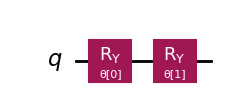

In [52]:
from qiskit.quantum_info import SparsePauliOp
from qiskit_algorithms import VQE
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit.circuit.library import TwoLocal

H = SparsePauliOp.from_list([('Z', -0.5), ('I', 0.)])
print(f"Qiskit SparsePauliOp: {H}")

ansatz = TwoLocal(num_qubits=H.num_qubits, rotation_blocks='ry', entanglement_blocks=None, reps=1)
ansatz = ansatz.decompose()

vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=SLSQP())
vqe.initial_point = [0.0] * ansatz.num_parameters  

result = vqe.compute_minimum_eigenvalue(H)
print(f'{result.eigenvalue} hartee')
ansatz.draw('mpl')

SparsePauliOp(['IIII', 'IIIZ', 'IIZI', 'IZII', 'ZIII', 'IIZZ', 'IZIZ', 'ZIIZ', 'YYYY', 'XXYY', 'YYXX', 'XXXX', 'IZZI', 'ZIZI', 'ZZII'],
              coeffs=[-0.81054798+0.j,  0.17218393+0.j, -0.22575349+0.j,  0.17218393+0.j,
 -0.22575349+0.j,  0.12091263+0.j,  0.16892754+0.j,  0.16614543+0.j,
  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,  0.0452328 +0.j,
  0.16614543+0.j,  0.17464343+0.j,  0.12091263+0.j])
-1.857275


/var/folders/d0/x8lpmss173z38_qn8c66v27h0000gn/T/ipykernel_16940/2014573978.py:38: DeprecationWarning: The class ``qiskit.primitives.estimator.Estimator`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseEstimatorV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Estimator` class is `StatevectorEstimator`.
  vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=SLSQP())


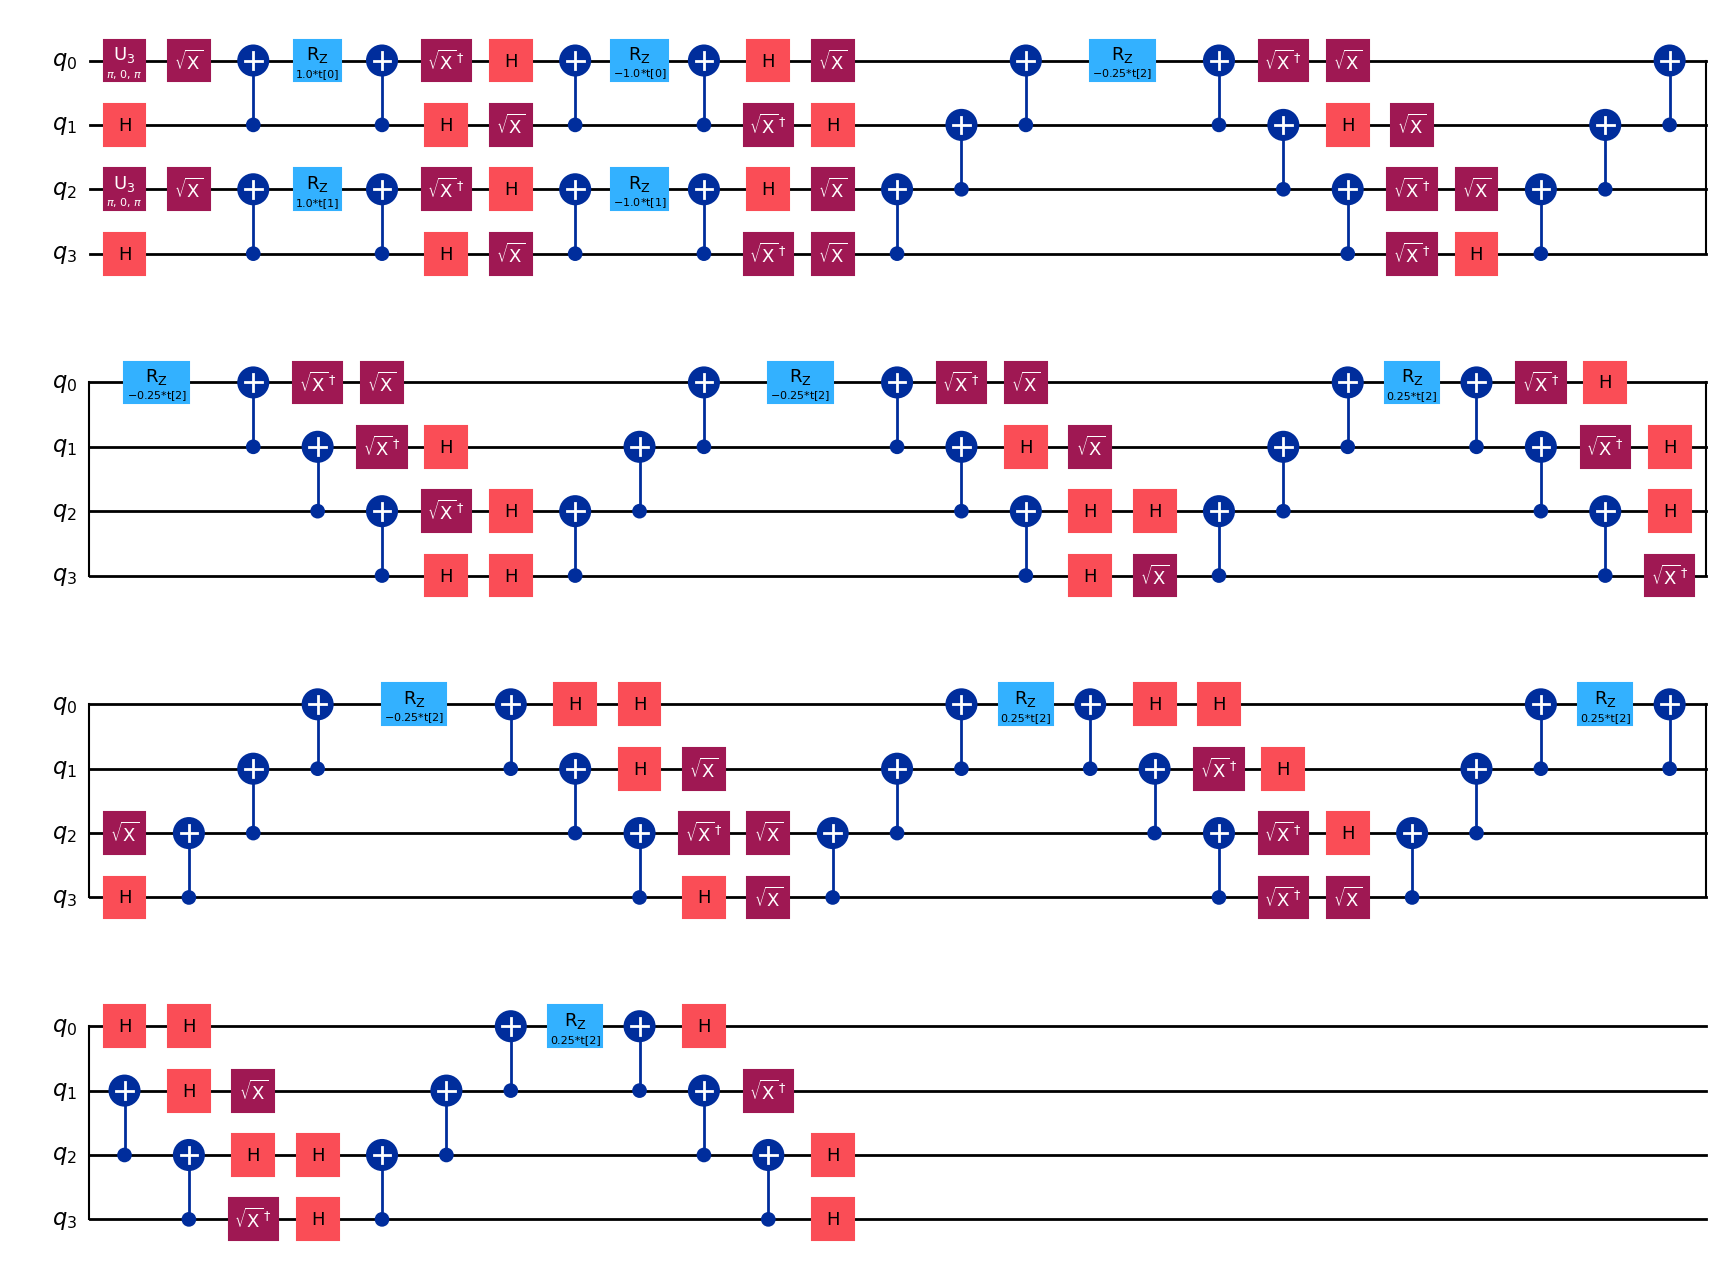

In [ ]:
from qiskit_nature.units import DistanceUnit
from qiskit_algorithms.optimizers import SLSQP
from qiskit.primitives import Estimator
from qiskit_nature.second_q.circuit.library import HartreeFock, UCCSD
from qiskit_nature.second_q.drivers import PySCFDriver
from qiskit_nature.second_q.mappers import JordanWignerMapper

driver = PySCFDriver(
    atom="H 0 0 0; H 0 0 0.735",
    basis="sto3g",
    charge=0,
    spin=0,
    unit=DistanceUnit.ANGSTROM,
)

es_problem = driver.run()

ferm_hamiltonian = es_problem.hamiltonian.second_q_op()
mapper = JordanWignerMapper()
qubit_op = mapper.map(ferm_hamiltonian)

print(qubit_op)

from qiskit.circuit.library import TwoLocal

ansatz = UCCSD(
    es_problem.num_spatial_orbitals,
    es_problem.num_particles,
    mapper,
    initial_state=HartreeFock(
        es_problem.num_spatial_orbitals,
        es_problem.num_particles,
        mapper,
    ),
)
ansatz = ansatz.decompose()

vqe = VQE(estimator=Estimator(), ansatz=ansatz, optimizer=SLSQP())
vqe.initial_point = [0.0] * ansatz.num_parameters

result = vqe.compute_minimum_eigenvalue(qubit_op)
print(f'{result.eigenvalue:.6f}')
ansatz.draw('mpl')
